**Questions we are trying to answer:**
*   What is the average age of people who showed up?
*   What is the percentage of overall people who showed up?

* Which factors have positive correlation which have impact on showing to the appointment?  
*   Which timeofday has more show?


*   Which age group attend more?
*   Did sms received impact on the attendance?


*   Did Scholarship impact on the attendance?
*   Did Hipertension impact on the attendance?

*   Did Alcoholism impact on the attendance?
*   Did Diabetes impact on the attendance?


*   Did Handcap impact on the attendance?
*   Did Gender impact on the attendance

In [1]:
#import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
#load the dataset
df = pd.read_csv('/content/noshowappointments-kagglev2-may-2016.csv')

**Data Wrangling**

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [5]:
#edit columns name to  lower first letter
df.columns = df.columns.str.lower().str.strip().str.replace('-','_')

In [6]:
df['patientid'] = df['patientid'].astype(int)

In [7]:
#edit the no show column to be adjusted to yes = 0 and No = 1 
df['no_show'] = pd.Series(map(lambda x: dict(Yes=0, No=1)[x],
              df['no_show'].values.tolist()), df['no_show'].index)

In [8]:
#check for Null Values
df.isnull().sum()

patientid         0
appointmentid     0
gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hipertension      0
diabetes          0
alcoholism        0
handcap           0
sms_received      0
no_show           0
dtype: int64

In [9]:
#check for duplicated rows
df.duplicated().sum()

0

In [10]:
#ajust the datatime 
df['scheduledday']= pd.to_datetime(df['scheduledday']).dt.tz_localize(None)
df['scheduledday']

0        2016-04-29 18:38:08
1        2016-04-29 16:08:27
2        2016-04-29 16:19:04
3        2016-04-29 17:29:31
4        2016-04-29 16:07:23
                 ...        
110522   2016-05-03 09:15:35
110523   2016-05-03 07:27:33
110524   2016-04-27 16:03:52
110525   2016-04-27 15:09:23
110526   2016-04-27 13:30:56
Name: scheduledday, Length: 110527, dtype: datetime64[ns]

In [11]:
df['appointmentday']= pd.to_datetime(df['appointmentday']).dt.tz_localize(None)
df['appointmentday']

0        2016-04-29
1        2016-04-29
2        2016-04-29
3        2016-04-29
4        2016-04-29
            ...    
110522   2016-06-07
110523   2016-06-07
110524   2016-06-07
110525   2016-06-07
110526   2016-06-07
Name: appointmentday, Length: 110527, dtype: datetime64[ns]

In [12]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   patientid       110527 non-null  int64         
 1   appointmentid   110527 non-null  int64         
 2   gender          110527 non-null  object        
 3   scheduledday    110527 non-null  datetime64[ns]
 4   appointmentday  110527 non-null  datetime64[ns]
 5   age             110527 non-null  int64         
 6   neighbourhood   110527 non-null  object        
 7   scholarship     110527 non-null  int64         
 8   hipertension    110527 non-null  int64         
 9   diabetes        110527 non-null  int64         
 10  alcoholism      110527 non-null  int64         
 11  handcap         110527 non-null  int64         
 12  sms_received    110527 non-null  int64         
 13  no_show         110527 non-null  int64         
dtypes: datetime64[ns](2), int64(10), obj

In [14]:
#overall unique possible columns
for column in df.iloc[:,np.r_[2,5:14]].columns:
    print("{}:\n{}".format(column,df[column].unique()))

gender:
['F' 'M']
age:
[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]
neighbourhood:
['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVE

In [15]:
#remove irrelavant elements in age 
df.drop(index = df[df.age == -1].index, inplace = True)

In [16]:
#check again overall unique possible columns
for column in df.iloc[:,np.r_[2,5:14]].columns:
    print("{}:\n{}".format(column,df[column].unique()))

gender:
['F' 'M']
age:
[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99]
neighbourhood:
['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSIT

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   patientid       110526 non-null  int64         
 1   appointmentid   110526 non-null  int64         
 2   gender          110526 non-null  object        
 3   scheduledday    110526 non-null  datetime64[ns]
 4   appointmentday  110526 non-null  datetime64[ns]
 5   age             110526 non-null  int64         
 6   neighbourhood   110526 non-null  object        
 7   scholarship     110526 non-null  int64         
 8   hipertension    110526 non-null  int64         
 9   diabetes        110526 non-null  int64         
 10  alcoholism      110526 non-null  int64         
 11  handcap         110526 non-null  int64         
 12  sms_received    110526 non-null  int64         
 13  no_show         110526 non-null  int64         
dtypes: datetime64[ns](2), int64(10), obj

In [99]:
#make age classification for the age
def agegroup (ageIntervals):
  if ageIntervals < 17 :
    return 'Child (0-16)'
  if ageIntervals < 30:
    return 'Young Adult (17-30)'
  if ageIntervals < 45:
    return 'Middle-age Adults (31-45)'
  else:
    return 'Old-age Adults (above 45)'

df['age_group'] = df.age.apply(agegroup)

In [19]:
#make a function for the periods of the day
def hourtime (currentTime):
  currentTime = int(currentTime.hour)
  if currentTime < 12:
    return 'morning'
  if currentTime > 12:
    return 'afternoon'
  if currentTime > 6:
    return 'evening'

df['timeofday'] = df.scheduledday.apply(hourtime)

In [20]:
#rename the no show to be show
new_labels = list(df.columns)
new_labels[13] = 'show'
df.columns = new_labels

In [21]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show,age_group,timeofday
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Old-age Adults (above 45),afternoon
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Old-age Adults (above 45),afternoon
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,Old-age Adults (above 45),afternoon
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,child (0-16),afternoon
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,Old-age Adults (above 45),afternoon


EDA explore data analysis

In [22]:
df_updated = df[['gender', 'age','scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap','sms_received', 'show', 'age_group', 'timeofday' ]]

In [23]:
df_updated.head()

,gender,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show,age_group,timeofday
0,F,62,0,1,0,0,0,0,1,Old-age Adults (above 45),afternoon
1,M,56,0,0,0,0,0,0,1,Old-age Adults (above 45),afternoon
2,F,62,0,0,0,0,0,0,1,Old-age Adults (above 45),afternoon
3,F,8,0,0,0,0,0,0,1,child (0-16),afternoon
4,F,56,0,1,1,0,0,0,1,Old-age Adults (above 45),afternoon


In [24]:
#create a mask to analyse more easily if people showed or not at ScheduledDay
show = df_updated.show == True
no_show = df_updated.show == False

In [25]:
df_updated.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.798066
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


the average age is 37.089219

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae3276cbd0>,
      dtype=object)

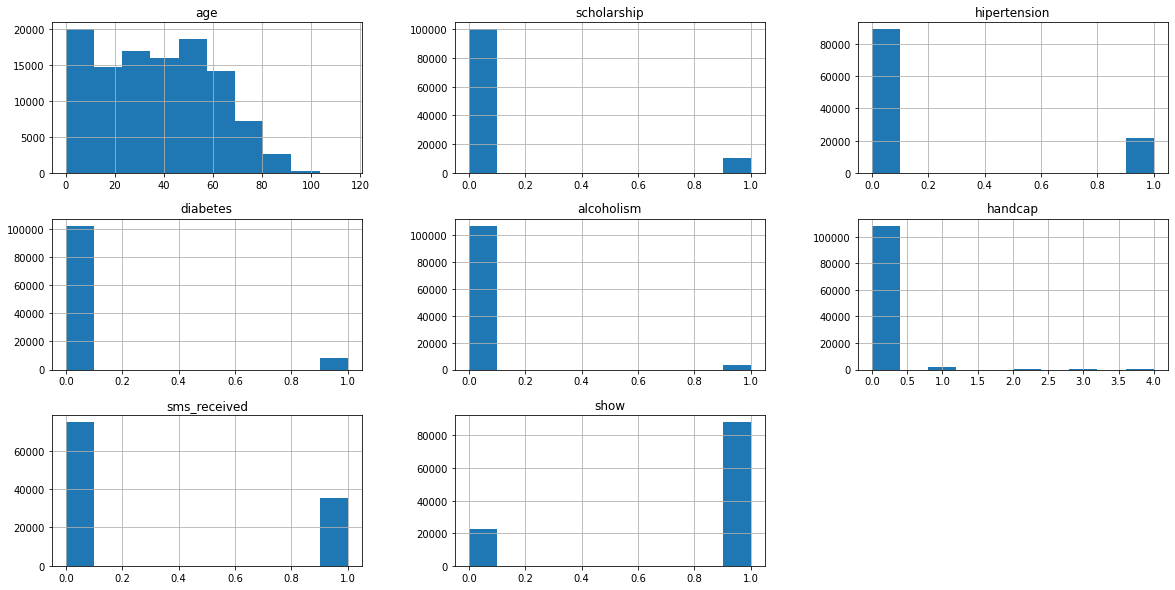

In [26]:
#visualising the histograms of the df_updated
df_updated[['age','scholarship','hipertension','diabetes','alcoholism'	,'handcap',	'sms_received','show']].hist(figsize=(20,10))

**What is the average age of people who showed up?**





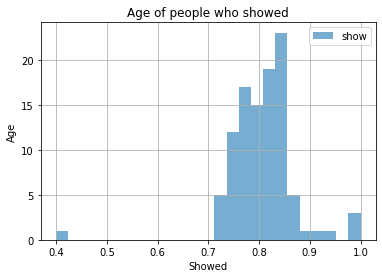

In [27]:
# using group by function to find relations between features 
# visualize the average of people who came + print the percentage

df.groupby('age')['show'].mean().hist(alpha=0.6,bins=25,label='show');
plt.xlabel("Showed")
plt.ylabel("Age")
plt.title("Age of people who showed")
plt.legend()

the graph shows the average age of people who showed up in their appointment

**What is the percentage of overall people who showed up?**

79.80656135208005


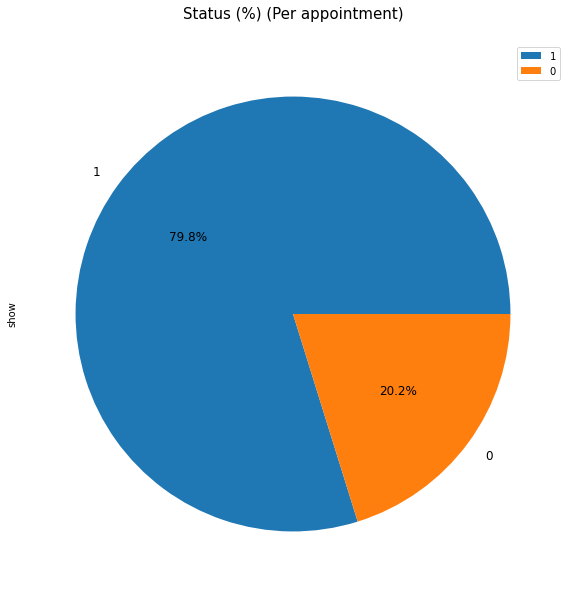

In [ ]:
#plot the percentage of the people who showed vs the not showed
allP = df['show'].value_counts()
print(allP[1] / allP.sum() * 100)
pieChart = allP.plot.pie(figsize=(10,10), autopct='%1.1f%%', fontsize = 12);
pieChart.set_title("Status" + ' (%) (Per appointment)\n', fontsize = 15);
plt.legend();

the graph above shows that the percentage of the patients who showed to their appointments are ~79.8% 

**Which factors have positive correlation which have impact on showing to the appointment?**

In [ ]:
#find the correlation between the factors 
cor_matrix = df_updated.corr()
cor_matrix

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
age,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,0.060327
scholarship,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,-0.029134
hipertension,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,0.035704
diabetes,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,0.015181
alcoholism,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,0.000197
handcap,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,0.006077
sms_received,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,-0.126428
show,0.060327,-0.029134,0.035704,0.015181,0.000197,0.006077,-0.126428,1.000000


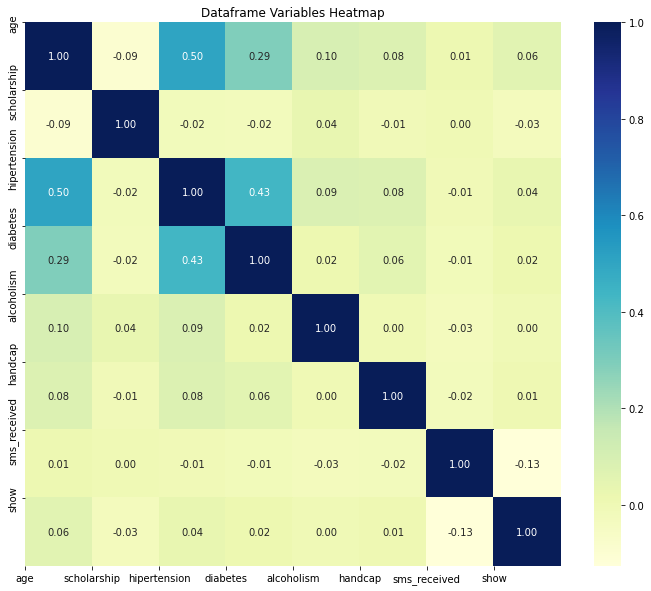

In [ ]:
#visualize the correlation between the factors
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cor_matrix,cmap="YlGnBu", annot=True, fmt=".2f")
plt.xticks(range(len(cor_matrix.columns)), cor_matrix.columns)
plt.yticks(range(len(cor_matrix.columns)), cor_matrix.columns)
ax.set_title('Dataframe Variables Heatmap')
plt.show()

there is a good correlation between:


*   age - hipertension
*   age - diabetes
*   hipertension - diabetes



In [84]:
#function of plotting
def plotgraph(dfcolumn):
  x = dfcolumn[show].value_counts().plot(kind = 'bar',color = 'green', label = 'showed')
  y = dfcolumn[no_show].value_counts().plot(kind = 'bar',color='red', label = 'notshowed')
  plt.legend()
  plt.ylabel('frequency')

In [100]:
#function of percentage of showing
def percentage(var):
  return(df_updated.groupby(var)['show'].mean()*100)


**Which timeofday has more show?**

Text(0.5, 0, 'time of day')

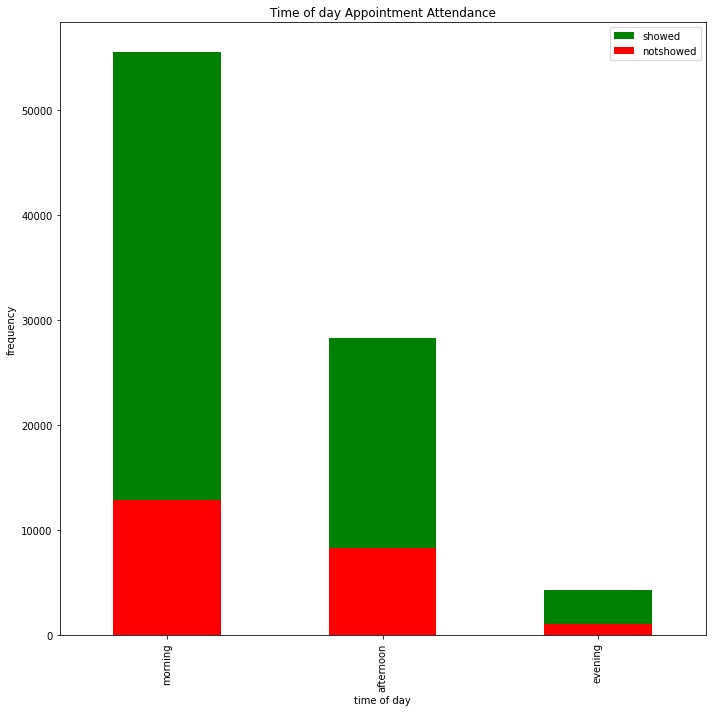

In [50]:
plotgraph(df_updated.timeofday)
plt.title('Time of day Appointment Attendance')
plt.xlabel('time of day')


the graph above showed that the time most people showed up in their appointment is the morning while the percentage is nearly close of the 3 periods

In [86]:
percentage(df_updated.timeofday)

timeofday
afternoon    77.329074
evening      79.638510
morning      81.144860
Name: show, dtype: float64



**Which age group attend more?**

Text(0.5, 0, 'age intervals')

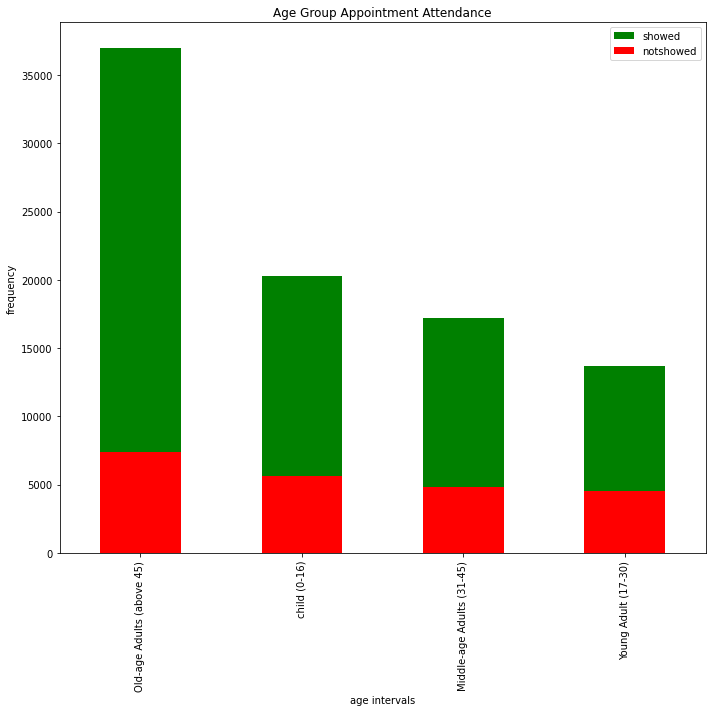

In [87]:
plotgraph(df_updated.age_group)
plt.title('Age Group Appointment Attendance')
plt.xlabel('age intervals')


the graph above shows that the most showed up: people are those with age above 45 years old while their percentages was nearly close

In [101]:
percentage(df_updated.age_group)

age_group
Middle-age Adults (31-45)    78.176369
Old-age Adults (above 45)    83.349101
Young Adult (17-30)          75.219298
child (0-16)                 78.349440
Name: show, dtype: float64

see the average age who showed up in their appointment and the average age who didn't show up

In [ ]:
df_updated.age[show].mean()

37.790504154999034

In [ ]:
df_updated.age[no_show].mean()

34.31766656212196

the percentages are so close to each other, although it seems that the **old people** attend more

**Did sms received impact on the attendance?**

Text(0.5, 0, 'received sms where (0:No, 1:Yes) ')

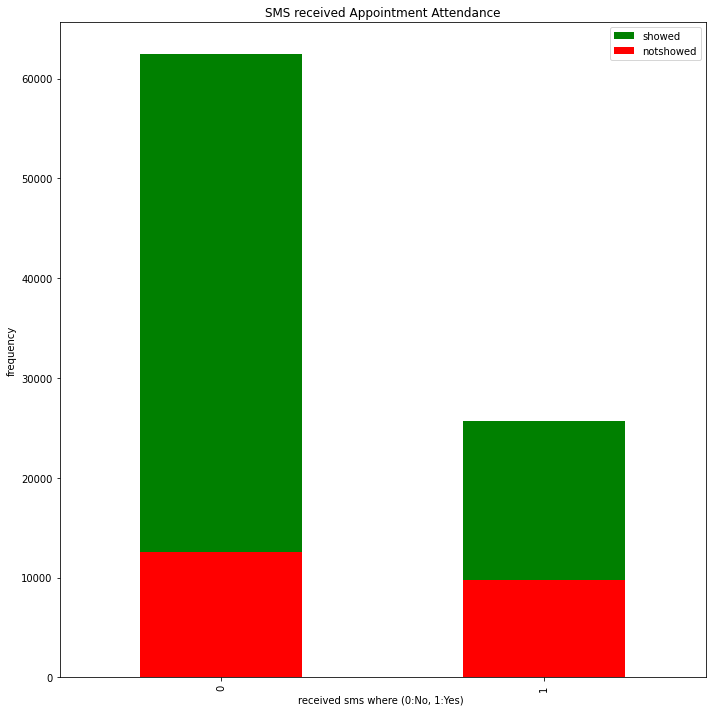

In [88]:
plotgraph(df_updated.sms_received)
plt.title('SMS received Appointment Attendance')
plt.xlabel('received sms where (0:No, 1:Yes) ')


the graph above shows that the most showed up: people are who didnt receive the sms while their percentages was nearly close

In [102]:
percentage(df_updated.sms_received)

sms_received
0    83.296466
1    72.425455
Name: show, dtype: float64

**Did Scholarship impact on the attendance?**

Text(0.5, 0, 'Scholarship(0:Not-received Sms, 1:received Sms)')

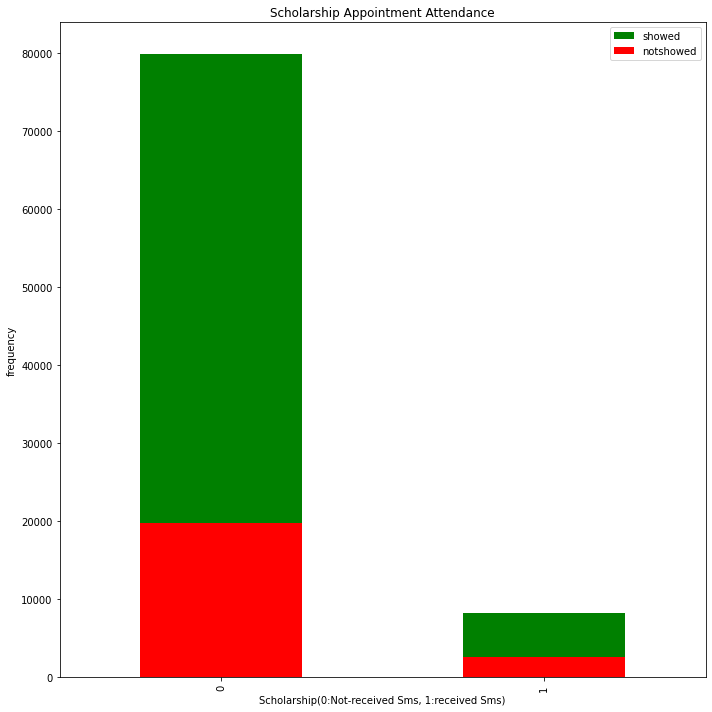

In [89]:
plotgraph(df_updated.scholarship)
plt.title('Scholarship Appointment Attendance')
plt.xlabel('Scholarship(0:Not-received Sms, 1:received Sms)')


the graph above shows that the most showed up: people are those who didn't have scholarship although their percentages was nearly close

In [103]:
percentage(df_updated.scholarship)

scholarship
0    80.192645
1    76.263696
Name: show, dtype: float64

**Did Hipertension impact on the attendance?**

Text(0.5, 0, 'Hipertension(0:Not-received Sms, 1:received Sms)')

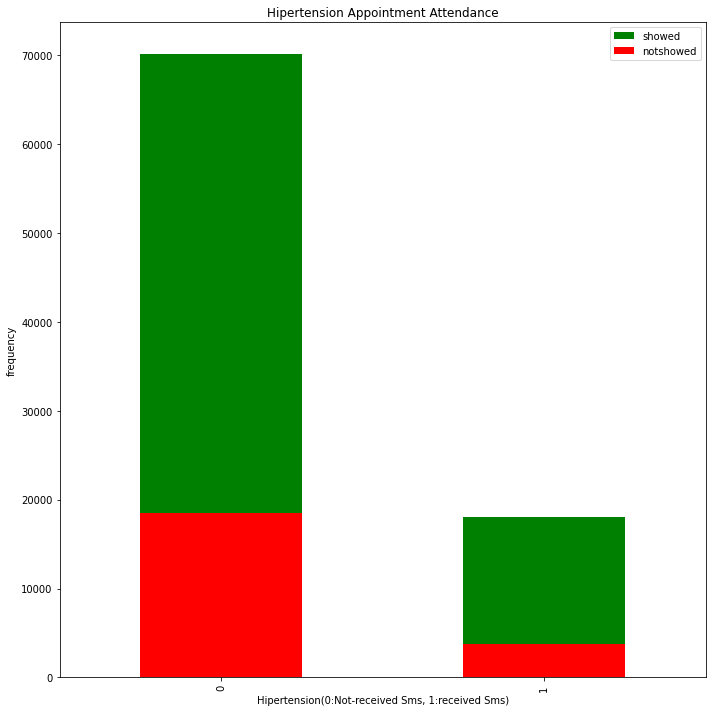

In [90]:
plotgraph(df_updated.hipertension)
plt.title('Hipertension Appointment Attendance')
plt.xlabel('Hipertension(0:Not-received Sms, 1:received Sms)')


the graph above shows that the most showed up: people are those who have hipertension although their percentages was nearly close

In [104]:
percentage(df_updated.hipertension)

hipertension
0    79.096083
1    82.698041
Name: show, dtype: float64

**Did Alcoholism impact on the attendance?**

Text(0.5, 0, 'Alcoholism (0:Not-received Sms, 1:received Sms)')

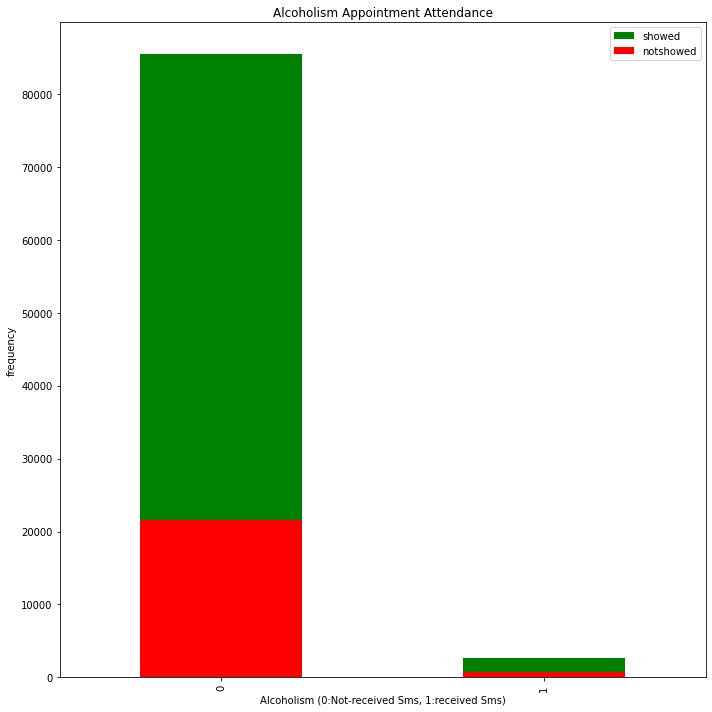

In [91]:
plotgraph(df_updated.alcoholism)
plt.title('Alcoholism Appointment Attendance')
plt.xlabel('Alcoholism (0:Not-received Sms, 1:received Sms)')


the graph above shows that the most showed up: people are those who have alcoholism although their percentages was nearly close

In [105]:
percentage(df_updated.alcoholism)

alcoholism
0    79.805162
1    79.851190
Name: show, dtype: float64

**Did Diabetes impact on the attendance?**

Text(0.5, 0, 'Diabetes(0:Not-received Sms, 1:received Sms)')

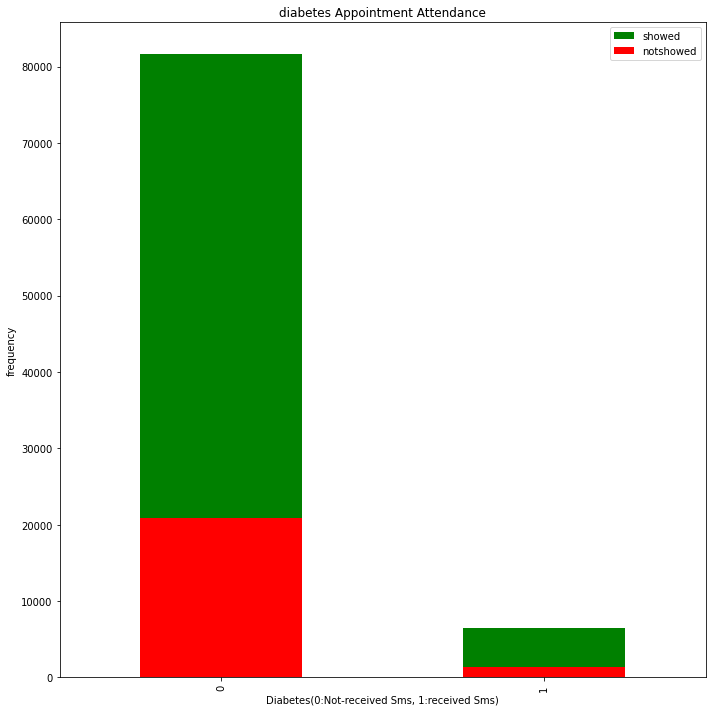

In [92]:
plotgraph(df_updated.diabetes)
plt.title('diabetes Appointment Attendance')
plt.xlabel('Diabetes(0:Not-received Sms, 1:received Sms)')


the graph above shows that the most showed up: people are those who have Diabetes although their percentages was nearly close

In [106]:
percentage(df_updated.diabetes)

diabetes
0    79.636977
1    81.996727
Name: show, dtype: float64

**Did Handcap impact on the attendance?**

Text(0.5, 0, 'Handcap(0:Not-received Sms, 1:received Sms)')

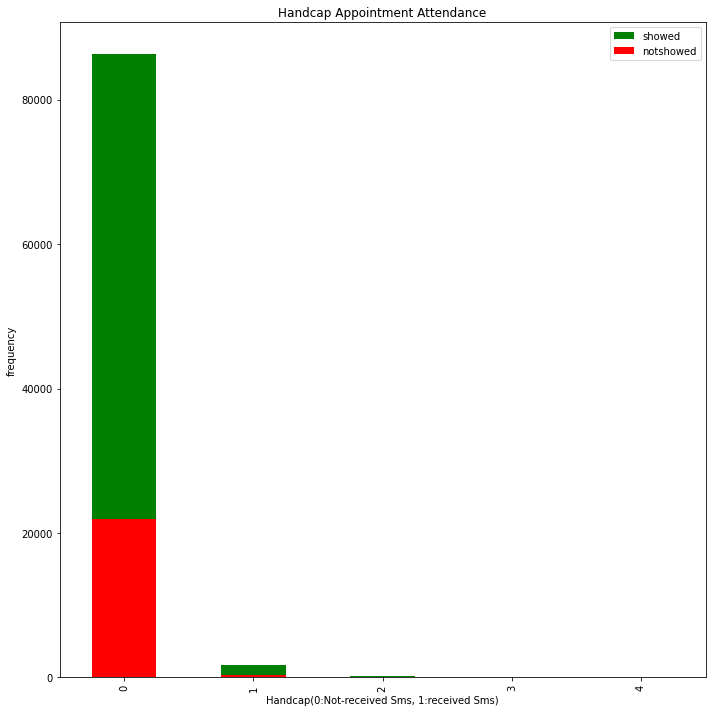

In [93]:
plotgraph(df_updated.handcap)
plt.title('Handcap Appointment Attendance')
plt.xlabel('Handcap(0:Not-received Sms, 1:received Sms)')

the graph above shows that the most showed up: people are those who have handcap although their percentages was nearly close

In [107]:
percentage(df_updated.handcap)

handcap
0    79.764510
1    82.076396
2    79.781421
3    76.923077
4    66.666667
Name: show, dtype: float64

**Did Gender impact on the attendance?**

Text(0.5, 0, 'gender(0:Not-received Sms, 1:received Sms)')

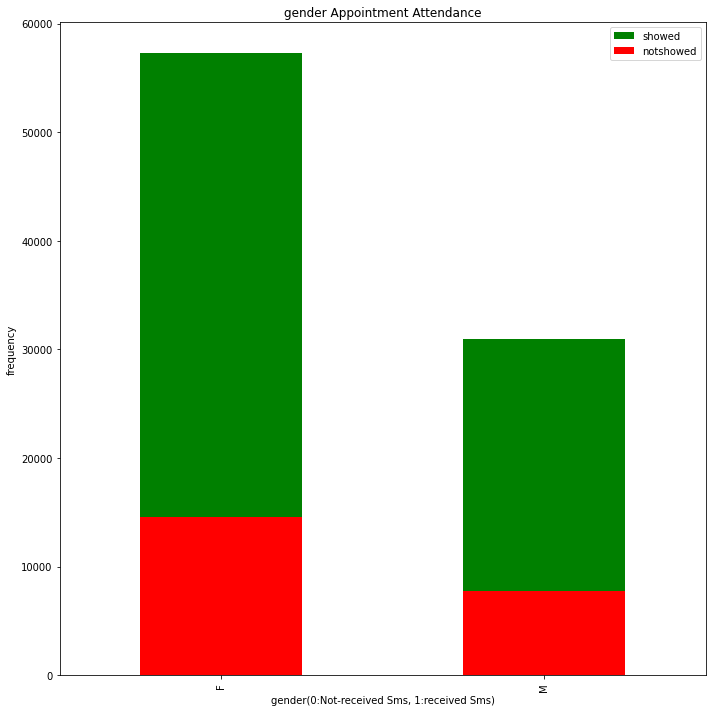

In [94]:
plotgraph(df_updated.gender)
plt.title('gender Appointment Attendance')
plt.xlabel('gender(0:Not-received Sms, 1:received Sms)')


the graph above shows that the most showed up: Men although the percentages was nearly close

In [108]:
percentage(df_updated.gender)

gender
F    79.685129
M    80.032052
Name: show, dtype: float64

**Limitations:**


*   there was some illogical data such as patients age was -1
*   missing features that could be more useful such as if the patient was employed or not, or the patient has a serious medical issue or not



**Conclusions**

all graphs above have nearly close percentages while it seems that those with (diabetes,hipertension, alcoholism, handcap) who didn't receive sms go to the appointment and mostly in the morning specially the old people and the scholarship didn't have an actual impact on the attendance

*   the Age is the most important factor which decided if a patient will show up or not where the avg of age who will show up is 37.790504154999034 while the average age of who won't show up is 34.31766656212196
*   a 20.2% didn't show up while 79.8% showed up in their appointment


*   the feature as gender, hipertension isn't a factor to decide whether the patient will come or not





*   people with hipertension, alcoholism, diabetes, handcap showed at their scheduled appointment
*   people go more often in the morning
*   old people above 45 showed more for their scheduled appointment
*  people who didnt receive sms showed more for their scheduled appointment
*   Male showed up in their appointment



summary:
the most showed up in their appointment:
old people above 45
in the morning 
who has diabetes, alcoholism, hipertension,handcap
no sms received
